# QUESTION TWO

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importing our Excel dataset and selecting the sheet
df = pd.read_excel("Data_CW2.xlsx", sheet_name=1, header=None)
df = df[0].str.split(",", expand=True)

#lebelling our dataset with following columns
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [176]:
# Convert feature columns to float, spliting into dependent and independent
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].astype(float)
y = df["species"]

In [3]:
#Displaying the first five rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5,2.3,3.4,0.9,Iris-versicolor
1,5,2.4,4.6,1.6,Iris-virginica
2,5.1,1.9,3.6,0.9,Iris-versicolor
3,5.1,2.2,3.4,0.9,Iris-versicolor
4,5.2,2.4,3.1,1,Iris-versicolor


In [177]:
#Displaying the last five columns
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
101,7.8,2.5,7,2.2,Iris-virginica
102,7.8,2.7,6.8,1.9,Iris-virginica
103,7.8,2.9,6.2,2.2,Iris-virginica
104,7.8,3.7,6.8,2.1,Iris-virginica
105,8,3.7,6.5,1.9,Iris-virginica


In [178]:
#Displaying the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  106 non-null    object
 1   sepal_width   106 non-null    object
 2   petal_length  106 non-null    object
 3   petal_width   106 non-null    object
 4   species       106 non-null    object
dtypes: object(5)
memory usage: 4.3+ KB


In [8]:
#Displaying the columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Convert feature columns to float, splitting to dependent and independent
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].astype(float)
y = df["species"]

In [39]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [6]:
#Training and splitting our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#standardize our dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Question 2.1

In [147]:
#Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [148]:
y_pred = knn.predict(X_test_scaled)

In [149]:
#Accuraccy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8181818181818182

Classification Report:
                  precision    recall  f1-score   support

Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.56      0.71         9

       accuracy                           0.82        22
      macro avg       0.88      0.78      0.79        22
   weighted avg       0.86      0.82      0.80        22



In [150]:
#unseen data (same feature format, no labels)
new_data = pd.DataFrame({
    "sepal_length": [6.6],
    "sepal_width": [3.2],
    "petal_length": [5.1],
    "petal_width": [1.5]
})

In [151]:
# Use the previously fitted scaler
new_data_scaled = scaler.transform(new_data)

In [152]:
predictions = knn.predict(new_data_scaled)
predictions

array(['Iris-versicolor'], dtype=object)

In [153]:
distances, indices = knn.kneighbors([X_test_scaled[0]])
neighbor_indices = indices.flatten()

In [154]:
print("Nearest Neighbors (k=3):")
print(f"Indices of nearest neighbors: {indices}")
print(f"Distances to nearest neighbors: {distances}")
print(f"Labels of nearest neighbors\n{y_train[neighbor_indices]}")

Nearest Neighbors (k=3):
Indices of nearest neighbors: [[83 43 40]]
Distances to nearest neighbors: [[0.67649643 0.81341668 0.99387958]]
Labels of nearest neighbors
83     Iris-virginica
43    Iris-versicolor
40    Iris-versicolor
Name: species, dtype: object


## Question 2.2
## Using even NN 4-NN
Setting k to an even number in the K-Nearest Neighbors (K-NN) algorithm can lead to ties when predicting the class of an unseen instance.
The algorithm won’t be able to clearly decide which class to assign.

For instances when we used k as 3 the majority was Iris-Versicular which our model predicted.

When we used Our K as 4 we had a tie, two iris-Virginica and two iris-versicolor so the model had to predict one

The possible solution is to use K as odd number

In [179]:
#fiting 4-NN
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [116]:
#predicting
y_pred4 = knn4.predict(X_test_scaled)


In [117]:
#Accuraccy of the model
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("\nClassification Report:\n", classification_report(y_test, y_pred4))

Accuracy: 0.8181818181818182

Classification Report:
                  precision    recall  f1-score   support

Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.56      0.71         9

       accuracy                           0.82        22
      macro avg       0.88      0.78      0.79        22
   weighted avg       0.86      0.82      0.80        22



In [118]:
#Unseen Data (same feature format, no labels,species)
new_data = pd.DataFrame({
    "sepal_length": [6.6],
    "sepal_width": [3.2],
    "petal_length": [5.1],
    "petal_width": [1.5]
})

In [119]:
#previously fitted scaler
new_data_scaled = scaler.transform(new_data)

In [120]:
#predicting the species of flower using the unseen data
predictions = knn4.predict(new_data_scaled)
predictions

array(['Iris-versicolor'], dtype=object)

In [133]:
#Finding the neighbors of the test point using kneighbors() method
distances, indices = knn4.kneighbors([X_test_scaled[0]])
neighbor_indices = indices.flatten()

In [137]:
#Printing the nearest neighbors and their labels
print("Nearest Neighbors (k=4):")
print(f"Indices of nearest neighbors: {indices}")
print(f"Distances to nearest neighbors: {distances}")
print(f"Labels of nearest neighbors\n{y_train[neighbor_indices]}")

Nearest Neighbors (k=4):
Indices of nearest neighbors: [[83 43 40 60]]
Distances to nearest neighbors: [[0.67649643 0.81341668 0.99387958 1.04420818]]
Labels of nearest neighbors
83     Iris-virginica
43    Iris-versicolor
40    Iris-versicolor
60     Iris-virginica
Name: species, dtype: object


## Question 2.3

## 5-NN

In [26]:
#5_NN
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [30]:
y_pred5 = knn5.predict(X_test_scaled)

In [171]:
#Accuraccy of the model
accuracy_5_NN=accuracy_score(y_test, y_pred5)
accuracy_5_NN

0.8181818181818182

In [159]:
#classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred5))


Classification Report:
                  precision    recall  f1-score   support

Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.56      0.71         9

       accuracy                           0.82        22
      macro avg       0.88      0.78      0.79        22
   weighted avg       0.86      0.82      0.80        22



Interpretation: Accuracy

Accuracy: 0.818 (81.8%)
This means 81.8% of all predictions were correct (18 out of 22 samples).

Precision:
Of the predictions the model made for this class, how many were correct?

Versicolor: 76% of predicted Versicolors were actually Versicolor.

Virginica: 100% of predicted Virginicas were actually Virginica.

Recall:
Of the actual samples of this class, how many did the model correctly identify?

Versicolor: Model correctly caught 100% of all Versicolor samples.

Virginica: Only 56% of Virginica samples were correctly identified.

F1-score:
Harmonic mean of precision and recall. A balance between both.

Versicolor: High score (0.87) — good performance.

Virginica: Lower score (0.71) — model is missing some Virginicas.

Support:
Number of actual samples per class in the test set.



confusion matrix

Each cell shows the number of samples classified into each category.
The diagonal values represent correct predictions.
Off-diagonal values show misclassifications.





In [44]:
#confusion matrix
cm5 = confusion_matrix(y_test, y_pred5, labels=knn5.classes_)

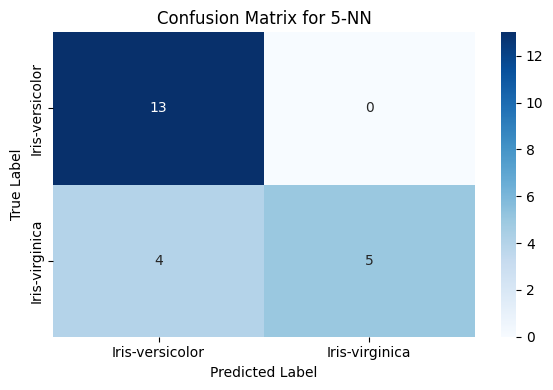

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', xticklabels=knn5.classes_, yticklabels=knn5.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for 5-NN")
plt.tight_layout()
plt.show()

Interpretation:Confusion matrix

13 Iris-versicolor flowers were correctly classified.

5 Iris-virginica flowers were correctly classified.

4 Iris-virginica flowers were wrongly classified as Iris-versicolor.

The model did not misclassify any Versicolor as Virginica.



## 7_NN

In [25]:
#7-NN
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
#predicting
y_pred7 = knn7.predict(X_test_scaled)

In [163]:
#Accuraccy of the model
accuracy_7_NN=accuracy_score(y_test, y_pred7)
accuracy_7_NN

0.8636363636363636

In [164]:
#classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred7))


Classification Report:
                  precision    recall  f1-score   support

Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.67      0.80         9

       accuracy                           0.86        22
      macro avg       0.91      0.83      0.85        22
   weighted avg       0.89      0.86      0.86        22



In [47]:
#confusion matrix
cm7 = confusion_matrix(y_test, y_pred7, labels=knn7.classes_)

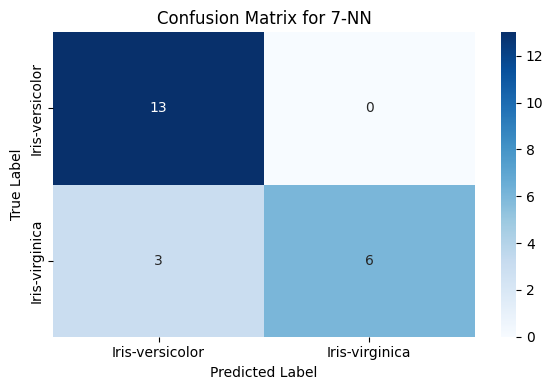

In [49]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm7, annot=True, fmt='d', cmap='Blues', xticklabels=knn7.classes_, yticklabels=knn7.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for 7-NN")
plt.tight_layout()
plt.show()

## 9-NN

In [35]:
#9-NN
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [51]:
y_pred9 = knn9.predict(X_test_scaled)

In [167]:
#Accuraccy of the model
accuracy_9_NN=accuracy_score(y_test, y_pred9)
accuracy_9_NN

0.8636363636363636

In [166]:
print("\nClassification Report:\n", classification_report(y_test, y_pred9))


Classification Report:
                  precision    recall  f1-score   support

Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.67      0.80         9

       accuracy                           0.86        22
      macro avg       0.91      0.83      0.85        22
   weighted avg       0.89      0.86      0.86        22



In [54]:
cm9 = confusion_matrix(y_test, y_pred9, labels=knn9.classes_)

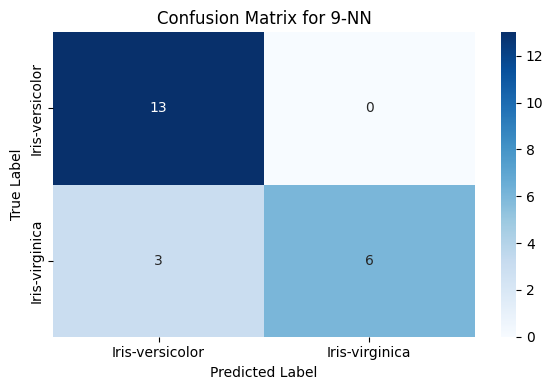

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm9, annot=True, fmt='d', cmap='Blues', xticklabels=knn9.classes_, yticklabels=knn9.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for 9-NN")
plt.tight_layout()
plt.show()

Visualizing which model is the best using accuracy

In [172]:
#creating a Dictionary with the accuracy of the model
accuracy={"knn5":(accuracy_5_NN),"knn7":(accuracy_7_NN),"knn9":(accuracy_9_NN)}
accuracy

{'knn5': 0.8181818181818182,
 'knn7': 0.8636363636363636,
 'knn9': 0.8636363636363636}

In [173]:
#converting the Dictionary to Series
acc=pd.Series(accuracy)

<Axes: >

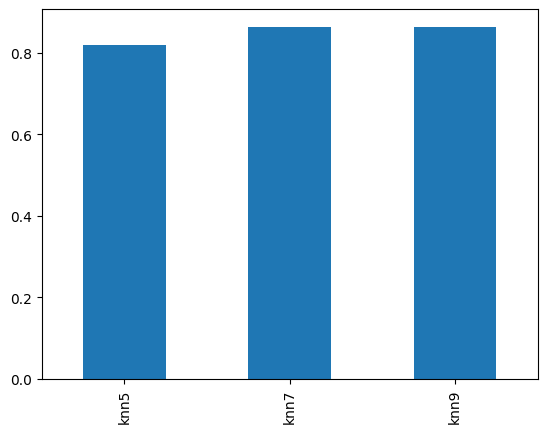

In [175]:
#Ploting the accuracy using Bar plot
acc.plot(kind="bar")

From the result 5-NN has the lowest accuraccy compared to 7-NN and 9-NN which have the same accuracy.

The best model to use is euther 7-NN or 9-NN